# NTDS'18 milestone 1: network collection and properties
[Effrosyni Simou](https://lts4.epfl.ch/simou), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `Team 16`
* Students: `Yinan Zhang, Yuting Huang, Shengzhao Xia, Zhantao Deng`
* Dataset: `IMDb Films`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to three sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective 

The purpose of this milestone is to start getting acquainted to the network that you will use for this class. In the first part of the milestone you will import your data using [Pandas](http://pandas.pydata.org) and you will create the adjacency matrix using [Numpy](http://www.numpy.org). This part is project specific. In the second part you will have to compute some basic properties of your network. **For the computation of the properties you are only allowed to use the packages that have been imported in the cell below.** You are not allowed to use any graph-specific toolboxes for this milestone (such as networkx and PyGSP). Furthermore, the aim is not to blindly compute the network properties, but to also start to think about what kind of network you will be working with this semester. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

## Part 1 - Import your data and manipulate them. 

###  A. Load your data in a Panda dataframe.

First, you should define and understand what are your nodes, what features you have and what are your labels. Please provide below a Panda dataframe where each row corresponds to a node with its features and labels. For example, in the the case of the Free Music Archive (FMA) Project, each row of the dataframe would be of the following form:


| Track   |  Feature 1  | Feature 2 | . . . | Feature 518|  Label 1 |  Label 2 |. . .|Label 16|
|:-------:|:-----------:|:---------:|:-----:|:----------:|:--------:|:--------:|:---:|:------:|
|         |             |           |       |            |          |          |     |        |

It is possible that in some of the projects either the features or the labels are not available. This is OK, in that case just make sure that you create a dataframe where each of the rows corresponds to a node and its associated features or labels.

##### 1. load dataset

In [31]:
# setting file path
File_path = r'D:/Document/Desktop/1.EPFL/Course/A Network Tour for Data Science/IMDb dataset'

credits_name = '/tmdb_5000_credits.csv'
movies_name = '/tmdb_5000_movies.csv'

In [32]:
# using kernal provided by kaggle to load data
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

movies_pd = load_tmdb_movies(File_path + movies_name)
credits_pd = load_tmdb_credits(File_path + credits_name)
# original_format = convert_to_original_format(movies, credits)


In [33]:
credits_pd.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [34]:
movies_pd.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


##### 2. extract data

In [35]:
movies_credits_pd = movies_pd.merge(credits_pd, left_on = 'id', right_on='movie_id')
movies_credits_extracted_pd = movies_credits_pd.drop(['homepage', 'original_language', 'overview', 'status', 'tagline', 'title_x', 'movie_id', 'keywords', 'release_date', 'runtime', 'spoken_languages', 'title_y'], axis=1)

In [36]:
# down sampling to reduce processing time
movies_credits_extracted_pd = movies_credits_extracted_pd.sample(frac=0.25)
movies_credits_extracted_pd.shape

(1201, 12)

### B. Create the adjacency matrix of your network.

Remember that there are edges connecting the attributed nodes that you organized in the dataframe above. The connectivity of the network is captured by the adjacency matrix $W$. If $N$ is the number of nodes, the adjacency matrix is an $N \times N$ matrix where the value of $W(i,j)$ is the weight of the edge connecting node $i$ to node $j$.  

There are two possible scenarios for your adjacency matrix construction, as you already learned in the tutorial by Benjamin:

1) The edges are given to you explicitly. In this case you should simply load the file containing the edge information and parse it in order to create your adjacency matrix. See how to do that in [this tutorial](../tutorials/02a_graph_from_edge_list.ipynb).

2) The edges are not given to you. In that case you will have to create a feature graph. In order to do that you will have to chose a distance that will quantify how similar two nodes are based on the values in their corresponding feature vectors. [This tutorial](../tutorials/02b_graph_from_features.ipynb) shows you how to build feature graphs when using Euclidean distances between feature vectors. Be curious and explore other distances as well! For instance, in the case of high-dimensional feature vectors, you might want to consider using the cosine distance. Once you compute the distances between your nodes you will have a fully connected network. Do not forget to sparsify by keeping the most important edges in your network.

Follow the appropriate steps for the construction of the adjacency matrix of your network and provide it in the Numpy array ``adjacency`` below: 

##### 1. data rephrase

We only use movie genres as our feature to compute adjecent matrix

In [37]:
movies_credits_extracted_pd.shape

(1201, 12)

In [38]:
# define genres that are considered as features
my_genre = ["Action","Adventure","Animation", "Biography","Comedy","Crime","Documentary","Drama",
            "Family","Fantasy","Film-Noir","History","Horror","Musical","Mystery","News","Romance",
            "Sci-Fi","Short","Sport","Thriller","War","Western"]
genre_vec_len = len(my_genre)

# generate feature vectors from 'genres'  in the dataframe
def extr_genre( kaggle_genre ):
    genre_vec = np.zeros(genre_vec_len)
    for ct_i in range(len(kaggle_genre)):
        genre = kaggle_genre[ct_i]['name']
        indices = [i for i, s in enumerate(my_genre) if genre in s]
        genre_vec[indices] = 1
    return genre_vec

movies_credits_featurized_Sris = movies_credits_extracted_pd.genres.apply( lambda x : extr_genre(x) )
movies_credits_featurized_Sris.head()


2109    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
4042    [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4422    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
618     [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
1450    [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
Name: genres, dtype: object

#####  2. generate the distance matrix
We observe that the cosine similarity between vector '1 0 1 1' and '1 0 1 1' is the same as the similarity between '1 0 0 0' and '1 0 0 0', while the former one should have higher similarity since they have more '1' in common. So, we believe cosine similarity is not an appropriate method to compute distance for our graph. Therefore, we modified cosine distance as below:
$$distance(u,v) = 1 - \frac{u \cdot v} {k},$$
where k is the maximum norm among all feature vectors.

In [39]:
genre_feature_array = np.array(movies_credits_featurized_Sris.tolist())
dot_mat = genre_feature_array @genre_feature_array.T
norm_dist = (genre_feature_array.T * genre_feature_array.T).sum(0, keepdims=True) ** .5
genre_dist_mat = 1 - dot_mat / (norm_dist.max())

In [40]:
genre_dist_mat[:3]

array([[0.18350342, 1.        , 0.59175171, ..., 0.59175171, 1.        ,
        0.59175171],
       [1.        , 0.18350342, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.59175171, 1.        , 0.18350342, ..., 1.        , 1.        ,
        0.59175171]])

##### 3. compute weights

In [41]:
# use the Gaussian function
kernel_width = genre_dist_mat.mean()
weights = np.exp(-genre_dist_mat**2 / kernel_width**2)
weights[:3]

array([[0.94342646, 0.17738077, 0.54574471, ..., 0.54574471, 0.17738077,
        0.54574471],
       [0.17738077, 0.94342646, 0.17738077, ..., 0.17738077, 0.17738077,
        0.17738077],
       [0.54574471, 0.17738077, 0.94342646, ..., 0.17738077, 0.17738077,
        0.54574471]])

In [42]:
adjacency = weights
tmp1 = np.diag(adjacency)        # extract diagnoal entries
tmp2 = np.diag(tmp1)             # build a diagonal matrix
adjacency = adjacency  - tmp2    # zero out diagonal entries
adjacency[:3]

array([[0.        , 0.17738077, 0.54574471, ..., 0.54574471, 0.17738077,
        0.54574471],
       [0.17738077, 0.        , 0.17738077, ..., 0.17738077, 0.17738077,
        0.17738077],
       [0.54574471, 0.17738077, 0.        , ..., 0.17738077, 0.17738077,
        0.54574471]])

## Part 2

Execute the cell below to plot the (weighted) adjacency matrix of your network.

Text(0.5,1.05,'adjacency matrix')

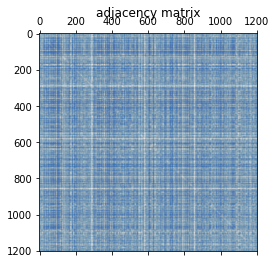

In [80]:
Threshold = 0.5
plt.spy(adjacency, precision = Threshold, markersize=0.005)
plt.title('adjacency matrix')

### Question 1

What is the maximum number of links $L_{max}$ in a network with $N$ nodes (where $N$ is the number of nodes in your network)? How many links $L$ are there in your collected network? Comment on the sparsity of your network.

In [81]:
N = adjacency.shape[0]
full_connect = int(N*(N-1)/2)
print('1. The number of nodes in our network is', N, 'and the maximum number of links in our network is ', full_connect, 'links.')
print('2. There are', sum(sum(adjacency > Threshold)), 'nodes in our network.')
print('3. Sparsity of our network is {:.2f}.'.format(sum(sum(adjacency > Threshold))/full_connect))

1. The number of nodes in our network is 1201 and the maximum number of links in our network is  720600 links.
2. There are 677074 nodes in our network.
3. Sparsity of our network is 0.94.


**Your answer here.**

### Question 2

Is your graph directed or undirected? If it is directed, convert it to an undirected graph by symmetrizing the adjacency matrix.

**Answer: Our graph is undirected graph.**

### Question 3

In the cell below save the features dataframe and the **symmetrized** adjacency matrix. You can use the Pandas ``to_csv`` to save the ``features`` and Numpy's ``save`` to save the ``adjacency``. We will reuse those in the following milestones.

In [82]:
movies_credits_extracted_pd.genres.to_csv('genre.csv')
np.save('adjacency',adjacency)

### Question 4

Are the edges of your graph weighted?

**Answer: Yes. our graph is weighted.**

### Question 5

What is the degree distibution of your network? 

In [84]:
Threshold = 0.3
n_nodes = len(adjacency)
degree = np.sum(adjacency > Threshold, axis = 1)

In [85]:
assert len(degree) == n_nodes

Execute the cell below to see the histogram of the degree distribution.

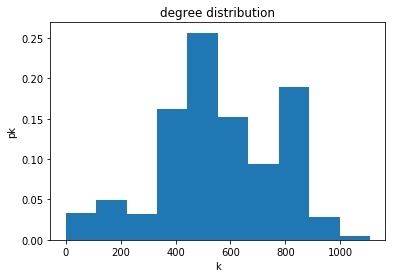

In [95]:
weights = np.ones_like(degree) / float(n_nodes)
plt.hist(degree, weights=weights);
plt.title("degree distribution")
plt.xlabel("k")
plt.ylabel("pk")
plt.show()

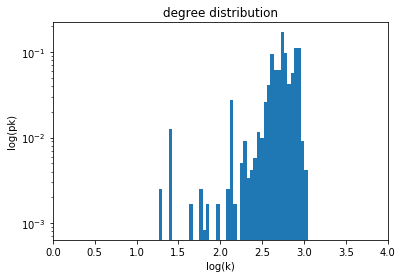

In [96]:
plt.hist(np.log10(degree+0.1), weights=weights, log = True, bins = 100);
plt.title("degree distribution")
plt.xlabel("log(k)")
plt.ylabel("log(pk)")
plt.xlim(0, 4)
plt.show()

What is the average degree?

In [20]:
print('The average degree is:{:.2f}'.format(np.mean(degree)))

The average degree is:2353.91


### Question 6

Comment on the degree distribution of your network.

**Answer: 25% of Nodes in our network have a degree of 500 and 18% of nodes have a degree of 900 while there are only a few of nodes whose degree is over 1000. After drawing the log-log plot, we find that the degree distribution of our network is similar to Poisson distribution, which might indicate that the IMDb dataset is a random networks.**

### Question 7

Write a function that takes as input the adjacency matrix of a graph and determines whether the graph is connected or not.

In [22]:
def connected_graph(adjacency):
    """Determines whether a graph is connected.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    bool
        True if the graph is connected, False otherwise.
    """
    
    length = adjacency.shape[0]    # 
    BFS_vect = np.zeros(length)    # vector to store the result [0 means not connected, 1 means connected]
    BFS_vect[0] = 1;               # start from node 0
    
    # here, we use vector 'team' as a queue, first in first out 
    team = np.array( np.where(adjacency[0,:] > Threshold)[0] )    # initialize the queue with the nodes directly connected node 0
    BFS_vect[team] = 1                                            # mark these nodes as 'connected' -- 1
    ct_i = 0                       # counter 
    
    while np.sum(team) != 0:
        
#         print('now, team is',team[ct_i])    # used to debug
        
        if ct_i <= len(team):      # we will not stop looping until the queue is empty
            
            # find nodes connecting to the node in team[ct_i], store those are not marked as 'connected' to the new_index 
            # 把和team[ct_i] 相连的节点找出来，其中有的节点在此前没有被查到过，把这些节点存起来，之后还要找连接了这些节点的点，直到遍历完没有新节点点
            new_index = np.setdiff1d( np.where(adjacency[team[ct_i], :] > Threshold)[0], np.where(BFS_vect > 0)[0] )
            
              # used to debug
#             print('now, adjacency>th is',np.where(adjacency[team[ct_i], :] > Threshold)[0], 'and BFS_vect>0', np.where(BFS_vect > 0)[0])
#             print('new_index is',new_index)    # used to debug
            
            BFS_vect[new_index] = 1               # mark these new nodes as connected 
            team = np.append(team, new_index )    # add new nodes to the queue
            
            team[ct_i] = 0                        # delete the node we have used in this step
            
            ct_i += 1
            
    connected_flag = sum(BFS_vect) == length      # compute whether we have treversing the whole network
    
    return connected_flag, BFS_vect.astype(int)

Is your graph connected? Run the ``connected_graph`` function to determine your answer.

In [121]:
Threshold = 0.5 # Threshold to control edge number, the higher treshold the less edges
connected_flag, BFS_vect = connected_graph(adjacency)
connected_flag

False

**Answer: When we let threshold equal to 0.5, our network (after downsampling) is not connected.**

### Question 8

Write a function that extracts the connected components of a graph.

In [122]:
def find_components(adjacency):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    search_flag = True
    temp_adjacency = adjacency    # avoid modifying the original adjacency matrix
    component_size = []           # size of component
    components = []               # list, to store all components found
    
    component_num = 0             # number of components
    
    while search_flag:
        
        [connected_flag, component_vec] = connected_graph(temp_adjacency)    # call the function above
       
        # extracting the adjcency matrix according to the 'component_vec'  exmaple [1100], then we extract the top-left 2*2 matrix 
        colume_slice_adj = temp_adjacency[ : , np.where(component_vec > 0)[0] ]    
        slice_adj = colume_slice_adj[np.where(component_vec > 0)[0], : ]
        
        # store newly sliced component
        components.append(slice_adj)
        component_num += 1
        
        # delet rows and columns that have been sliced
        temp_adjacency = np.delete(temp_adjacency, np.where(component_vec>0), axis = 0)
        temp_adjacency = np.delete(temp_adjacency, np.where(component_vec>0), axis = 1)
        
        # store commponent size
        component_size.append(sum(component_vec > 0))
        
        if(temp_adjacency.shape[0] <= 0):    # if we have traversed the adjcency matrix, stop
            search_flag = False
        
    return components, component_num, component_size
    

In [123]:
Threshold = 0.5
components, component_num, component_size = find_components(adjacency)

In [124]:
component_num, component_size

(13, [1189, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

How many connected components is your network composed of? What is the size of the largest connected component? Run the ``find_components`` function to determine your answer. 

**Answer: After after downsampling, when we let threshold equal to 0.5, there are 13 components in our network. Only one of them is a groph, the others are iondividual nodes.**

### Question 9

Write a function that takes as input the adjacency matrix and a node (`source`) and returns the length of the shortest path between that node and all nodes in the graph using Dijkstra's algorithm. **For the purposes of this assignment we are interested in the hop distance between nodes, not in the sum of weights. **

Hint: You might want to mask the adjacency matrix in the function ``compute_shortest_path_lengths`` in order to make sure you obtain a binary adjacency matrix. 

In [125]:
def compute_shortest_path_lengths(adjacency, source):
    """Compute the shortest path length between a source node and all nodes.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    
    Returns
    -------
    list of ints
        The length of the shortest path from source to all nodes. Returned list should be of length n_nodes.
    """
    # the main structure is the same as question 7, but has a few modifications
    length = adjacency.shape[0]
    shortest_path_lengths = -1 * np.ones(length)    # like the BFS_vec in question 7, here we store the path length rather than connected nodes
                                                    # -1 means not connected
    shortest_path_lengths[source] = 0;  # source node, path length is 0
    
    team = np.array( np.where(adjacency[source,:] > Threshold)[0] )  # same as question 7, initalizing the queue with nodes connected to the source node
    team_dist = np.ones(len(team))      # storing path lenth of the node in the 'team'  example
                                        # team = [2 3 5 4 2], team_dist = [1 1 2 2 3], means path length from source to node 2,3 is 1, to nodes 5,4 is 2, etc.
    
    shortest_path_lengths[team] = 1     # path length of all nodes connnected to the source node is 1 
    
    ct_i = 0
    while np.sum(team) != 0:
        
        if ct_i <= len(team):   
            
            # find newly connected nodes
            new_index = np.setdiff1d( np.where(adjacency[team[ct_i], :] > Threshold)[0], np.where(shortest_path_lengths > -1)[0] )
            
            if new_index.size != 0:                                              # if we do find new nodes
                # since new nodes connectted to the node in team[ct_i], path length of these new nodes should be path length of team[ct_i] + 1
                # so, here below is team_dist[ct_i] + 1 
                shortest_path_lengths[new_index] = team_dist[ct_i] + 1           
                team = np.append( team, new_index )                              # append these new node to vecter 'team' 
                team_dist = np.append( team_dist, np.ones(len(new_index))*(team_dist[ct_i] + 1) )    # record path length of these new nodes which are added to the 'team'
                
            team[ct_i] = 0
            
            ct_i += 1
    
    return shortest_path_lengths

In [126]:
Threshold = 0.50
distance = compute_shortest_path_lengths(adjacency, 40)

In [127]:
distance.max()

2.0

**Answer: After after downsampling, when we let threshold equal to 0.5, the shortest path of the dominant component is 2.**

### Question 10

The diameter of the graph is the length of the longest shortest path between any pair of nodes. Use the above developed function to compute the diameter of the graph (or the diameter of the largest connected component of the graph if the graph is not connected). If your graph (or largest connected component) is very large, computing the diameter will take very long. In that case downsample your graph so that it has 1.000 nodes. There are many ways to reduce the size of a graph. For the purposes of this milestone you can chose to randomly select 1.000 nodes. 

In [ ]:
Threshold = 0.2
components, component_num, component_size = find_components(adjacency)

In [ ]:
# find the largest comoponent
max_id = 4
for ct_i in range(len(components)):
    max_component = components[max_id]
    pre_component = components[ct_i]
    if max_component.shape[0] <= pre_component.shape[0]:
        max_id = ct_i

# compute_shortest_path_lengths(components(ct_i))
max_id

In [ ]:
diameter = 0
largest_component_adj = components[max_id]
for node_i in range(largest_component_adj.shape[0]):
    shortest_path_lengths = compute_shortest_path_lengths(largest_component_adj, node_i)
    if diameter <= shortest_path_lengths.max():
        diameter = shortest_path_lengths.max()
        
diameter

### Question 11

Write a function that takes as input the adjacency matrix, a path length, and two nodes (`source` and `target`), and returns the number of paths of the given length between them.

In [ ]:
def compute_paths(adjacency, source, target, length):
    """Compute the number of paths of a given length between a source and target node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    target: int
        The target node. A number between 0 and n_nodes-1.
    length: int
        The path length to be considered.
    
    Returns
    -------
    int
        The number of paths.
    """
    
    # Your code here.
    
    return n_paths

Test your function on 5 pairs of nodes, with different lengths.

In [ ]:
print(compute_paths(adjacency, 0, 10, 1))
print(compute_paths(adjacency, 0, 10, 2))
print(compute_paths(adjacency, 0, 10, 3))
print(compute_paths(adjacency, 23, 67, 2))
print(compute_paths(adjacency, 15, 93, 4))

### Question 12

How many paths of length 3 are there in your graph? Hint: calling the `compute_paths` function on every pair of node is not an efficient way to do it.

In [ ]:
# Your code here.

### Question 13

Write a function that takes as input the adjacency matrix of your graph (or of the largest connected component of your graph) and a node and returns the clustering coefficient of that node. 

In [ ]:

!!! $$$$ larget component 
Threshold = 0.5
temp_13_adjacency = adjacency
temp_13_adjacency[temp_13_adjacency < Threshold] = 0
unweighted_adjacency = np.where(temp_13_adjacency == 0, 0, 1)
print(unweighted_adjacency)

In [ ]:
def compute_clustering_coefficient(unweighted_adjacency, node):
    """Compute the clustering coefficient of a node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    node: int
        The node whose clustering coefficient will be computed. A number between 0 and n_nodes-1.
    
    Returns
    -------
    float
        The clustering coefficient of the node. A number between 0 and 1.
    """

    k_node_num = np.sum(unweighted_adjacency[node])
    k_node = np.where(unweighted_adjacency[node] == 1)[0]
    tmp1 = unweighted_adjacency[k_node, :]
    tmp2 = tmp1[:, k_node]
    L = np.sum(tmp2)/2
    if k_node_num == 0 or k_node_num ==1:
        clustering_coefficient = 0
    else:
        clustering_coefficient = 2*L/(k_node_num*(k_node_num-1))
    return clustering_coefficient

In [ ]:
compute_clustering_coefficient( unweighted_adjacency, 1 )

### Question 14

What is the average clustering coefficient of your graph (or of the largest connected component of your graph if your graph is disconnected)? Use the function ``compute_clustering_coefficient`` to determine your answer.

In [ ]:
def compute_average_clustering_coefficient(adjacency):
    unweighted_adjacency = np.where(adjacency == 0, 0, 1)
    clustering_coefficient = []
    for i in range(adjacency.shape[0]):
        clustering_coefficient.append(compute_clustering_coefficient(unweighted_adjacency, i))
    average_clustering_coefficient = np.sum(clustering_coefficient)/adjacency.shape[0]
    return average_clustering_coefficient

In [ ]:
compute_average_clustering_coefficient(adjacency)